Within this notebook I created a script where I took the two AOI grasslands, and overlayed them on top of their states and counties. All three layers I queried and set the coordinate system UTM 13 

In [1]:
%store -r

Unable to restore variable 'band_dict', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'ndvi_da', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [2]:
#Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import zipfile

In [3]:
#applied a query on my usfs.gdf, counties gdf and states gdf

#loading my usfs_gdf
usfs_gdf = gpd.read_file(usfs_shp_path)

#query on my two grasslands field (GRASSLANDN) and grassland names (Kiowa National Grassland, Pawnee National Grassland )
usfs_queried_gdf = usfs_gdf[usfs_gdf["GRASSLANDN"].isin(["Kiowa National Grassland","Pawnee National Grassland"])]
                             
print(usfs_queried_gdf)

      NATIONALGR                 GRASSLANDN   GIS_ACRES  SHAPE_AREA  \
2   295508010328   Kiowa National Grassland  144281.321    0.058543   
17  295523010328  Pawnee National Grassland  208424.885    0.089972   

    SHAPE_LEN                                           geometry  
2    9.858642  MULTIPOLYGON (((-104.30414 36.08063, -104.3041...  
17  15.341594  MULTIPOLYGON (((-104.58106 40.82664, -104.5810...  


c:\Users\arago\miniconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [4]:
#applied a query on my counties gdf 

#loading my counties_gdf
counties_gdf = gpd.read_file(counties_shp_path)

#query on my two grasslands field (GRASSLANDN) and grassland names (Kiowa National Grassland, Pawnee National Grassland )
counties_queried_gdf = counties_gdf[
    (counties_gdf["NAME"].isin(["Colfax","More", "Harding", "Weld"]) & 
     (counties_gdf)["STATEFP"].isin(["08","35"]))
]
                             
print(counties_queried_gdf)

     STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD  \
1681      35      007  00929117  0500000US35007  35007   Colfax   06   
2387      35      021  00933055  0500000US35021  35021  Harding   06   
2818      08      123  00198177  0500000US08123  08123     Weld   06   

            ALAND    AWATER                                           geometry  
1681   9733110158  26299632  POLYGON ((-105.34976 36.56142, -105.35792 36.5...  
2387   5504963126   1162620  POLYGON ((-104.43046 36.2136, -104.43606 36.21...  
2818  10323763901  79558364  MULTIPOLYGON (((-104.97989 40.03305, -104.9780...  


In [5]:
#applied a query on my  states gdf

#loading my states_gdf
states_gdf = gpd.read_file(states_shp_path)

#query on my two grasslands field (GRASSLANDN) and grassland names (Kiowa National Grassland, Pawnee National Grassland )
states_queried_gdf = states_gdf[states_gdf["STATEFP"].isin(["08","35"])]
                             
print(states_queried_gdf)

   STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
2       35  00897535  0400000US35    35     NM  New Mexico   00  314196306401   
31      08  01779779  0400000US08    08     CO    Colorado   00  268422891711   

        AWATER                                           geometry  
2    728776523  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
31  1181621593  POLYGON ((-109.06025 38.59933, -109.05954 38.7...  


In [6]:
#printing all three gdf (states_queried_gdf, counties_queried_gdf, usfs_queried_gdf) tables to view

print(usfs_queried_gdf, states_queried_gdf, counties_queried_gdf)

      NATIONALGR                 GRASSLANDN   GIS_ACRES  SHAPE_AREA  \
2   295508010328   Kiowa National Grassland  144281.321    0.058543   
17  295523010328  Pawnee National Grassland  208424.885    0.089972   

    SHAPE_LEN                                           geometry  
2    9.858642  MULTIPOLYGON (((-104.30414 36.08063, -104.3041...  
17  15.341594  MULTIPOLYGON (((-104.58106 40.82664, -104.5810...      STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
2       35  00897535  0400000US35    35     NM  New Mexico   00  314196306401   
31      08  01779779  0400000US08    08     CO    Colorado   00  268422891711   

        AWATER                                           geometry  
2    728776523  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
31  1181621593  POLYGON ((-109.06025 38.59933, -109.05954 38.7...        STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD  \
1681      35      007  00929117  0500000US35007  35007   Colfax  

Setting layers into the same coordinate system based on location: UTM Zone 13N

Kiowa National Grassland = eastern NM
Pawnee National Grassland = eastern CO

Eastern New Mexico: UTM Zone 13N
Eastern Colorado: UTM Zone 13N

UTM Zone 13N = "EPSG:32613"

In [7]:
# setting all three gdf to the same CRS

usfs_st_cnt_crs = "EPSG:32612"  
states_queried_gdf = states_queried_gdf.to_crs(usfs_st_cnt_crs)
counties_queried_gdf = counties_queried_gdf.to_crs(usfs_st_cnt_crs)
usfs_queried_gdf = usfs_queried_gdf.to_crs(usfs_st_cnt_crs)



Plotting all three layers overlayed each other

C:\Users\arago\AppData\Local\Temp\ipykernel_26268\552874373.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\arago\AppData\Local\Temp\ipykernel_26268\552874373.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


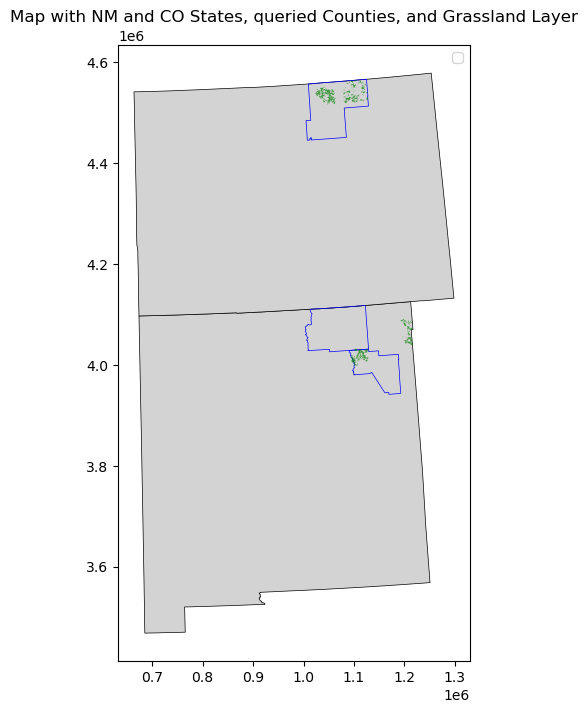

In [8]:
#plotting all three gdf (states_queried_gdf, counties_queried_gdf, usfs_queried_gdf) view
fig, ax = plt.subplots(figsize=(12, 8))

# Plot states (base layer)
states_queried_gdf.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5, label="States")

# Plot counties (second layer)
counties_queried_gdf.plot(ax=ax, color="none", edgecolor="blue", linewidth=0.5, label="Counties")

# Plot grassland layer (top layer)
usfs_queried_gdf.plot(ax=ax, color="GREEN", marker="o", label="Overlay Layer", alpha=0.7)

# legend and title
plt.legend()
plt.title("Map with NM and CO States, queried Counties, and Grassland Layer")
plt.show()

Queried the usfs data of my grasslands into two study site variables

study_site1 = Kiowa National Grassland in New Mexico

study_site2 = Pawnee National Grassland in Colorado

In [9]:
#applied a query on my usfs.gdf into two study site variables

#loading my usfs_gdf
usfs_gdf = gpd.read_file(usfs_shp_path)

#query on my two grasslands field (GRASSLANDN) and grassland names (Kiowa National Grassland, Pawnee National Grassland )
study_site1_gdf = usfs_gdf[usfs_gdf["GRASSLANDN"].isin(["Kiowa National Grassland"])]
                             
print(study_site1_gdf)

     NATIONALGR                GRASSLANDN   GIS_ACRES  SHAPE_AREA  SHAPE_LEN  \
2  295508010328  Kiowa National Grassland  144281.321    0.058543   9.858642   

                                            geometry  
2  MULTIPOLYGON (((-104.30414 36.08063, -104.3041...  


In [10]:
#applied a query on my usfs.gdf into two study site variables
#loading my usfs_gdf
usfs_gdf = gpd.read_file(usfs_shp_path)

#query on my two grasslands field (GRASSLANDN) and grassland names (Kiowa National Grassland, Pawnee National Grassland )
study_site2_gdf = usfs_gdf[usfs_gdf["GRASSLANDN"].isin(["Pawnee National Grassland"])]
                             
print(study_site1_gdf)

     NATIONALGR                GRASSLANDN   GIS_ACRES  SHAPE_AREA  SHAPE_LEN  \
2  295508010328  Kiowa National Grassland  144281.321    0.058543   9.858642   

                                            geometry  
2  MULTIPOLYGON (((-104.30414 36.08063, -104.3041...  


In [11]:
%store usfs_df usfs_gdf studyarea_data counties_gdf states_gdf states_df counties_df usfs_shp_path counties_shp_path states_shp_path states_queried_gdf counties_queried_gdf usfs_queried_gdf study_site1_gdf study_site2_gdf

Stored 'usfs_df' (DataFrame)
Stored 'usfs_gdf' (GeoDataFrame)
Stored 'studyarea_data' (str)
Stored 'counties_gdf' (GeoDataFrame)
Stored 'states_gdf' (GeoDataFrame)
Stored 'states_df' (DataFrame)
Stored 'counties_df' (DataFrame)
Stored 'usfs_shp_path' (str)
Stored 'counties_shp_path' (str)
Stored 'states_shp_path' (str)
Stored 'states_queried_gdf' (GeoDataFrame)
Stored 'counties_queried_gdf' (GeoDataFrame)
Stored 'usfs_queried_gdf' (GeoDataFrame)
Stored 'study_site1_gdf' (GeoDataFrame)
Stored 'study_site2_gdf' (GeoDataFrame)
